In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
my_year_month_fmt = mdates.DateFormatter('%m/%y')
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import scorer

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

C:\Users\swapk\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [121]:
data = pd.read_csv('stock_data.csv')
data.rename(columns={'Date':'date'},inplace=True)
sentiments_df = pd.read_csv('./preprocessing/sentiments.csv')

In [122]:
sentiments_df['date'] = pd.to_datetime(sentiments_df['date'])
data.date = pd.to_datetime(data.date)
sentiments_df.head()

,Unnamed: 0,ticker,name,date,headline,body,newsType,text,score
0,0,AAPL,Apple Inc,2011-07-06,UPDATE 1-Samsung estimates Q2 profit down 26 pct,* Sees Q2 op profit at 3.7 trln won vs 3.9 tr...,topStory,"['update', '1', 'samsung', 'estimates', 'q2', ...",0
1,4,AAPL,Apple Inc,2011-07-07,UPDATE 1-Canada eyes Nortel patent sale review...,* Gives no detail on timeline for decision (...,topStory,"['update', '1', 'canada', 'eyes', 'nortel', 'p...",0
2,14,AAPL,Apple Inc,2011-07-08,Analysis: Young startups demand steeper prices...,SAN FRANCISCO A year ago Mike Maples's invest...,topStory,"['analysis', 'young', 'startups', 'demand', 's...",0
3,18,AAPL,Apple Inc,2011-07-11,RIM annual meeting likely to exacerbate invest...,TORONTO Research In Motion investors desperate...,topStory,"['rim', 'annual', 'meeting', 'likely', 'exacer...",2
4,26,AAPL,Apple Inc,2011-07-12,Electronic Arts buying PopCap Games for up to ...,NEW YORK Electronic Arts Inc the video game ...,topStory,"['electronic', 'arts', 'buying', 'popcap', 'ga...",3


# Combine financial and sentiment data

In [123]:
data = pd.merge(data,sentiments_df,on='date',how='left')
data.head()

,date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 0,ticker,name,headline,body,newsType,text,score
0,1999-12-31,3.604911,3.674107,3.553571,3.671875,2.458919,40952800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-03,3.745536,4.017857,3.631696,3.997768,2.677157,133949200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-04,3.866071,3.950893,3.613839,3.660714,2.451444,128094400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-05,3.705357,3.948661,3.678571,3.714286,2.487319,194580400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-06,3.790179,3.821429,3.392857,3.392857,2.272070,191993200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate Short Mean Average (20 days)

In [124]:
data['short_rolling'] = data['Adj Close'].rolling(window=20).mean()
data.head(20)

,date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 0,ticker,name,headline,body,newsType,text,score,short_rolling
0,1999-12-31,3.604911,3.674107,3.553571,3.671875,2.458919,40952800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-03,3.745536,4.017857,3.631696,3.997768,2.677157,133949200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-04,3.866071,3.950893,3.613839,3.660714,2.451444,128094400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-05,3.705357,3.948661,3.678571,3.714286,2.487319,194580400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-06,3.790179,3.821429,3.392857,3.392857,2.272070,191993200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000-01-07,3.446429,3.607143,3.410714,3.553571,2.379695,115183600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000-01-10,3.642857,3.651786,3.383929,3.491071,2.337840,126266000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000-01-11,3.426339,3.549107,3.232143,3.312500,2.218258,110387200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000-01-12,3.392857,3.410714,3.089286,3.113839,2.085222,244017200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000-01-13,3.374439,3.526786,3.303571,3.455357,2.313924,258171200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calculate Long Mean Average (100 days)

In [125]:
data['long_rolling'] = data['Adj Close'].rolling(window=100).mean()
data.tail()

,date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 0,ticker,name,headline,body,newsType,text,score,short_rolling,long_rolling
4712,2018-09-24,216.820007,221.259995,216.630005,220.789993,220.022293,27693400,8365.0,AAPL,Apple Inc,Deals of the day-Mergers and acquisitions,Sept 24 The following bids mergers acquisiti...,topStory,"['deals', 'day', 'mergers', 'acquisitions', 's...",0.0,221.197207,198.074993
4713,2018-09-25,219.750000,222.820007,219.699997,222.190002,221.417435,24554400,8369.0,AAPL,Apple Inc,Qualcomm accuses Apple of stealing its secrets...,Qualcomm Inc on Tuesday accused Apple Inc of s...,topStory,"['qualcomm', 'accuses', 'apple', 'stealing', '...",2.0,221.408968,198.539326
4714,2018-09-26,221.000000,223.750000,219.759995,220.419998,219.653595,23984700,8373.0,AAPL,Apple Inc,Apple Salesforce team up to bring Siri to mor...,SAN FRANCISCO Apple Inc and Salesforce.com In...,topStory,"['apple', 'salesforce', 'team', 'bring', 'siri...",0.0,221.444843,198.917368
4715,2018-09-27,223.820007,226.440002,223.539993,224.949997,224.167831,30181200,8374.0,AAPL,Apple Inc,US STOCKS-Apple Amazon lead Wall St higher,* Indexes up: 0.26 pct S&P 0.44 pct Nasdaq 0...,topStory,"['us', 'stocks', 'apple', 'amazon', 'lead', 'w...",0.0,221.543000,199.327396
4716,2018-09-28,224.789993,225.839996,224.020004,225.740005,224.955093,22929400,8379.0,AAPL,Apple Inc,U.S. trade judge declines to block iPhone impo...,A U.S. trade judge on Friday declined to block...,topStory,"['u', 'trade', 'judge', 'declines', 'block', '...",1.0,221.578377,199.736493


# Calculate Exponential Mean Average (20 days)

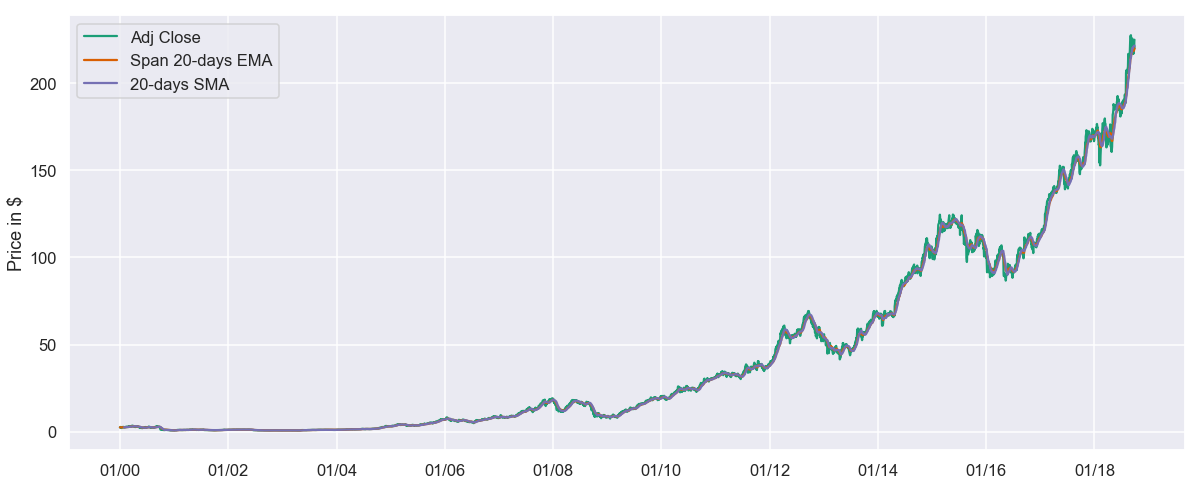

In [126]:
data['ema_short'] = data['Adj Close'].ewm(span=20, adjust=False).mean()

fig, ax = plt.subplots(figsize=(20,8))

ax.plot(data.date, data['Adj Close'], label='Adj Close')
ax.plot(data.date, data.ema_short, label = 'Span 20-days EMA')
ax.plot(data.date, data.short_rolling, label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')
ax.xaxis.set_major_formatter(my_year_month_fmt)

# Calculate trading positions

Difference between `Adjusted Closing Price` and `EMA` will give the raw position of the stock. If the difference is positive then we are at a profitable position, so we can consider selling.

## Sentiment Categories

 - 0: neutral
 - 1: negative
 - 2: very negative
 - 3: positive
 - 4: very positive
 - 5: no sentiment

In [166]:
data['trading_positions_raw'] = data['Adj Close'] - data.ema_short

In [167]:
data['trading_positions_raw'].describe()

count    4717.000000
mean        0.438144
std         2.123461
min       -13.060000
25%        -0.114107
50%         0.077323
75%         0.861002
max        14.163577
Name: trading_positions_raw, dtype: float64

Impute missing sentiment scores as category 5

In [168]:
data['score'] = data['score'].fillna(5)

## Trading Positions

 - -1: Sell
 - +1: Buy
 - 0: Hold

### When to sell?

 - if `trading_positions_raw > standard_deviation` 
 - if sentiment score is in category 1, 2 or 5
 
### When to buy?

 - if `trading_positions_raw < neg(standard_deviation)`
 - if sentiment score is in category 3, 4 or 5
 
## Why standard deviation?

The `trading_positions_raw` is likely to flip at standard deviation, so that is the best point to make decisions. 

In [170]:
data['trading_positions'] = 0
data.loc[(data['trading_positions_raw'] > 2) & ((data['score'] == 1) | (data['score'] == 2) | (data['score'] == 5)), 'trading_positions'] = -1

data.loc[(data['trading_positions_raw'] < -2) & ((data['score'] == 3) | (data['score'] == 4) | (data['score'] == 5)), 'trading_positions'] = 1
data.head()

,date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 0,ticker,name,...,newsType,text,score,short_rolling,long_rolling,ema_short,trading_positions_raw,trading_positions,Open-Close,High-Low
0,1999-12-31,3.604911,3.674107,3.553571,3.671875,2.458919,40952800,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,2.458919,0.000000,0,-0.066964,0.120536
1,2000-01-03,3.745536,4.017857,3.631696,3.997768,2.677157,133949200,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,2.479704,0.197453,0,-0.252232,0.386161
2,2000-01-04,3.866071,3.950893,3.613839,3.660714,2.451444,128094400,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,2.477012,-0.025568,0,0.205357,0.337054
3,2000-01-05,3.705357,3.948661,3.678571,3.714286,2.487319,194580400,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,2.477994,0.009325,0,-0.008929,0.270090
4,2000-01-06,3.790179,3.821429,3.392857,3.392857,2.272070,191993200,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,2.458382,-0.186312,0,0.397322,0.428572


Buy on the first day

In [171]:
data.loc[0,'trading_positions'] = 1
data.head()

,date,Open,High,Low,Close,Adj Close,Volume,Unnamed: 0,ticker,name,...,newsType,text,score,short_rolling,long_rolling,ema_short,trading_positions_raw,trading_positions,Open-Close,High-Low
0,1999-12-31,3.604911,3.674107,3.553571,3.671875,2.458919,40952800,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,2.458919,0.000000,1,-0.066964,0.120536
1,2000-01-03,3.745536,4.017857,3.631696,3.997768,2.677157,133949200,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,2.479704,0.197453,0,-0.252232,0.386161
2,2000-01-04,3.866071,3.950893,3.613839,3.660714,2.451444,128094400,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,2.477012,-0.025568,0,0.205357,0.337054
3,2000-01-05,3.705357,3.948661,3.678571,3.714286,2.487319,194580400,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,2.477994,0.009325,0,-0.008929,0.270090
4,2000-01-06,3.790179,3.821429,3.392857,3.392857,2.272070,191993200,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,2.458382,-0.186312,0,0.397322,0.428572


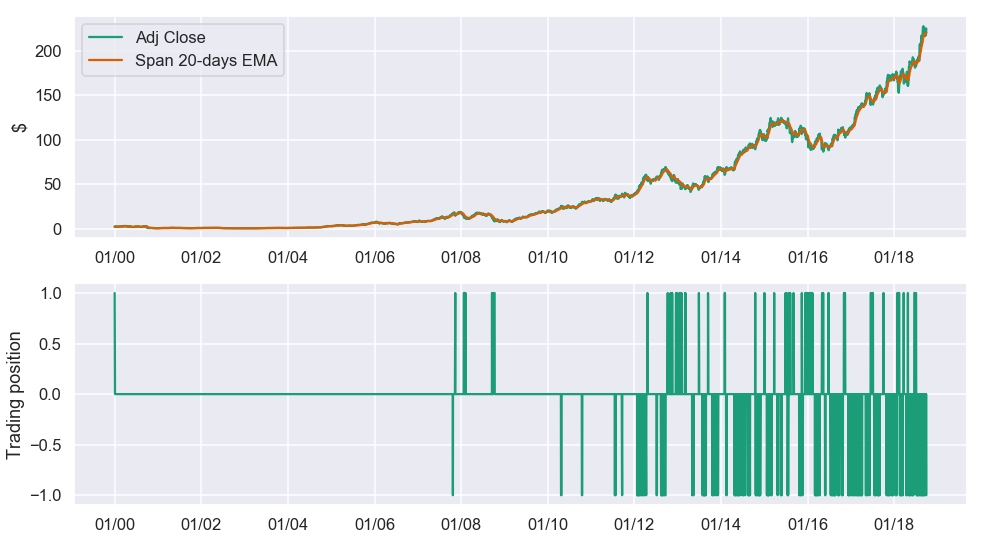

In [172]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(data.date, data['Adj Close'], label='Adj Close')
ax1.plot(data.date, data.ema_short, label = 'Span 20-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(data.date, data.trading_positions, 
        label='Trading position')

ax2.set_ylabel('Trading position')
ax2.xaxis.set_major_formatter(my_year_month_fmt)

# Feature Generation

In [173]:
data['Open-Close'] = data.Open - data.Close
data['High-Low'] = data.High - data.Low

In [174]:
x = data[['Open-Close','High-Low','ema_short','score']]
y = data.trading_positions

# Train/Test Split

In [175]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check feature importances

In [176]:
model = GradientBoostingClassifier().fit(X_train, y_train)

importances = model.feature_importances_

# Plot
importances

array([0.20284481, 0.24816526, 0.36080194, 0.188188  ])

# Using SVM

In [177]:
cls = SVC().fit(X_train, y_train)

In [178]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))

accuracy_test = accuracy_score(y_test, cls.predict(X_test))

In [179]:
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))

print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 94.46%
Test Accuracy: 90.89%


# Using KNN

In [180]:
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 7


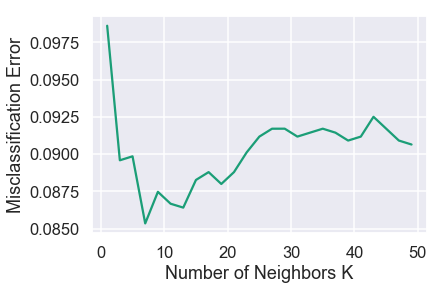

In [181]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [182]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [183]:
accuracy_train = accuracy_score(y_train, knn.predict(X_train))

accuracy_test = accuracy_score(y_test, knn.predict(X_test))

In [184]:
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))

print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 92.98%
Test Accuracy: 91.21%


# Generating buy/sell plot

In [185]:
buys = data[data['trading_positions'] == 1]
sells = data[data['trading_positions'] == -1]

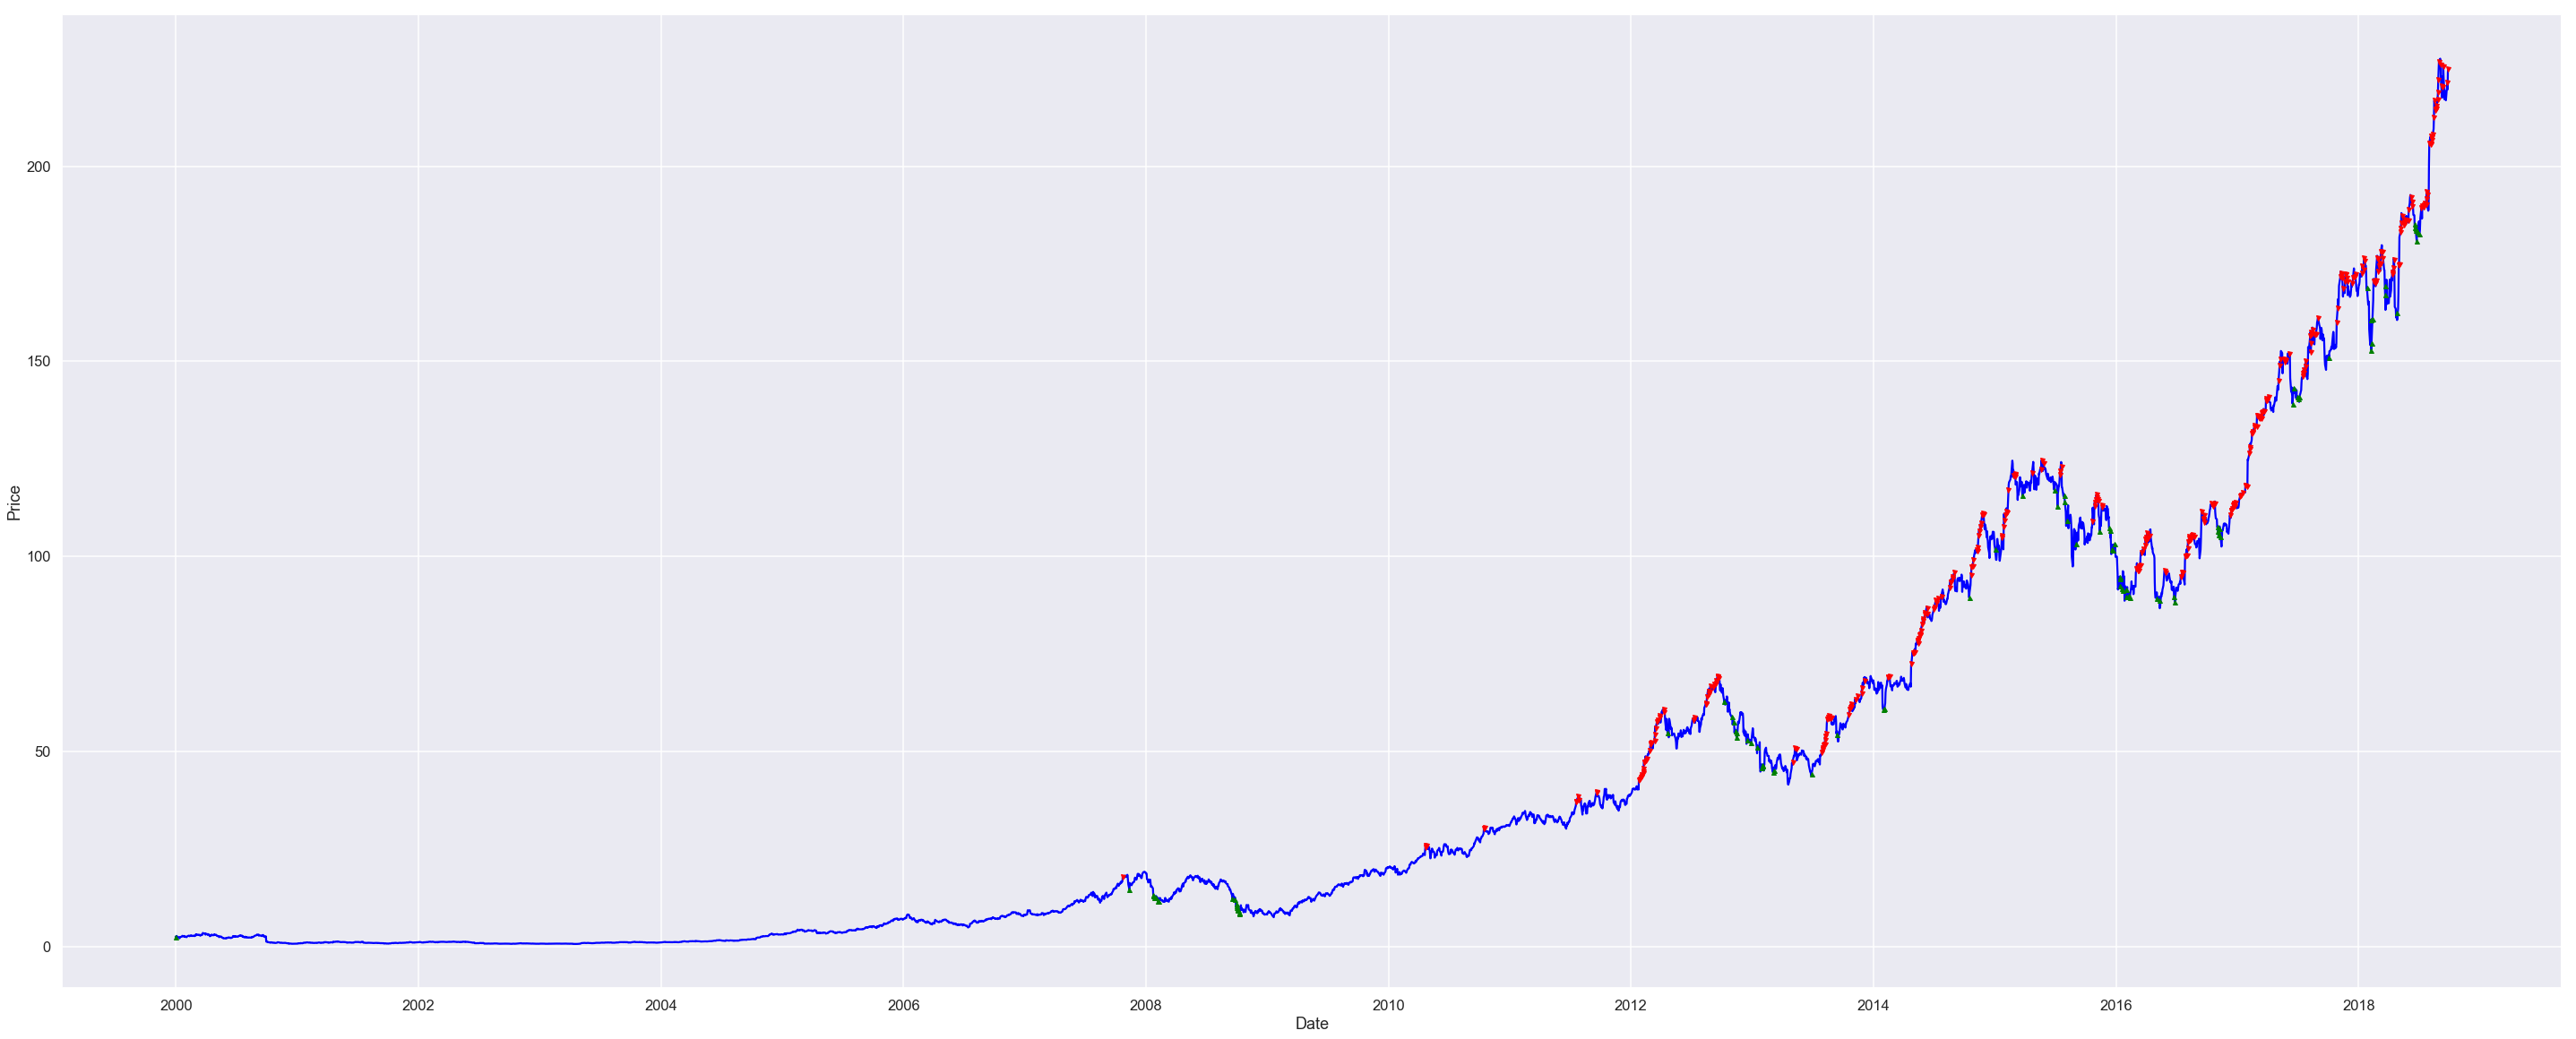

In [186]:
fig, ax1 = plt.subplots(figsize=(50,20))
ax1.plot(data.date, data['Adj Close'], label='Adj Close', color='b')
# Plot the buy and sell signals on the same plot
ax1.plot(sells.date, data.iloc[sells.index]['Adj Close'], 'v', markersize=5, color='r')
ax1.plot(buys.date, data.iloc[buys.index]['Adj Close'], '^', markersize=5, color='g')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
# Display everything
plt.show()

In [187]:
data.to_csv("formatted_aapl_stock_data_sentiment.csv")